<a href="https://colab.research.google.com/github/jholiner/Talento_Tech/blob/main/Laboratorio_1_Jholiner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar la libreria para manipular datos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Leemos los datos

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Establesco conexion

path = "/content/drive/MyDrive/Colab Notebooks/DA_Talento/data/db/dataset_banco.csv"

In [ ]:
#creamos un dataframe con los datos suministrados

df_banco = pd.read_csv(path)

#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual de ingresos en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

# **Visualización y Exploración de Datos:**

In [ ]:
df_banco.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
df_banco.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no
45214,37,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361.0,2,188.0,11,other,no


In [ ]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [ ]:
df_banco.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df_banco.shape

(45215, 17)

In [ ]:
df_banco = pd.read_csv(path, delimiter=";")
print (df_banco.columns)

Index(['age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y'], dtype='object')


## Transformación de nombres de atributos

In [ ]:
# Renombramos las columnas

df_banco = df_banco.rename (columns = {'age':'edad','job':'trabajo','marital':'estado_civil','education':'educacion','default':'morosidad','balance':'saldo','housing':'vivienda','loan':'prestamo','contact':'contacto','day':'dia','month':'mes','duration':'duracion','campaign':'campana','pdays':'dias_previos','previous':'anterior','poutcome':'resultado','y':'respuesta'})
df_banco.head()


,edad,trabajo,estado_civil,educacion,morosidad,saldo,vivienda,prestamo,contacto,dia,mes,duracion,campana,dias_previos,anterior,resultado,respuesta
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
# Verificamos los cambios
df_banco.head()

,edad,trabajo,estado_civil,educacion,morosidad,saldo,vivienda,prestamo,contacto,dia,mes,duracion,campana,dias_previos,anterior,resultado,respuesta
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
# Clasificar columnas
categoricas = df_banco.select_dtypes(include=['object']).columns.tolist()
numericas = df_banco.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Columnas categóricas:", categoricas)
print("Columnas numéricas:", numericas)

Columnas categóricas: ['trabajo', 'estado_civil', 'educacion', 'morosidad', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado', 'respuesta']
Columnas numéricas: ['edad', 'saldo', 'dia', 'duracion', 'campana', 'dias_previos', 'anterior']


In [ ]:
pd.value_counts(df_banco['trabajo'])

trabajo
blue-collar       9731
management        9455
technician        7599
admin.            5168
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

# **Otras formas de renombrar**

In [ ]:
# Comando para contar los valores faltantes de mi DataFrame
df_banco.isna().sum()

edad            0
trabajo         2
estado_civil    1
educacion       1
morosidad       0
saldo           2
vivienda        0
prestamo        0
contacto        0
dia             0
mes             0
duracion        1
campana         0
dias_previos    1
anterior        0
resultado       0
respuesta       0
dtype: int64

In [ ]:
# Elimino los valores faltantes del DF
df_banco.dropna(inplace=True)

#conteo de valores por columna de mi DF
df_banco.count()

edad            45207
trabajo         45207
estado_civil    45207
educacion       45207
morosidad       45207
saldo           45207
vivienda        45207
prestamo        45207
contacto        45207
dia             45207
mes             45207
duracion        45207
campana         45207
dias_previos    45207
anterior        45207
resultado       45207
respuesta       45207
dtype: int64

In [ ]:
#conteo de los niveles en los diferentes columnas categoricas
cols_cat = ['trabajo','estado_civil','educacion','morosidad','vivienda','prestamo','contacto','mes','resultado','respuesta']

for col in cols_cat:
  print(f'Columna {col} : {df_banco[col].nunique()} subniveles')

  #print(df_banco[col].value_counts())


Columna trabajo : 18 subniveles
Columna estado_civil : 6 subniveles
Columna educacion : 10 subniveles
Columna morosidad : 2 subniveles
Columna vivienda : 2 subniveles
Columna prestamo : 6 subniveles
Columna contacto : 5 subniveles
Columna mes : 12 subniveles
Columna resultado : 6 subniveles
Columna respuesta : 2 subniveles


In [ ]:
#Conteo los valores
pd.value_counts(df_banco['trabajo'])

trabajo
blue-collar       9731
management        9455
technician        7599
admin.            5168
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

In [ ]:
# Calcular la desviación estándar para las columnas numéricas
desviaciones_estandar = df_banco[['edad', 'saldo', 'dia', 'duracion', 'campana', 'dias_previos', 'anterior']].std()

# Imprimir las desviaciones estándar
print(desviaciones_estandar)

edad              12.036647
saldo           3924.255525
dia                8.322473
duracion         257.605175
campana            3.097910
dias_previos     100.120622
anterior           2.303438
dtype: float64


In [ ]:
#desviacion estandar para la variable 'pdays'
destd_pdays = df_banco[['dias_previos']].std()

# Imprimir las desviaciones estándar
print(destd_pdays)

dias_previos    100.120622
dtype: float64


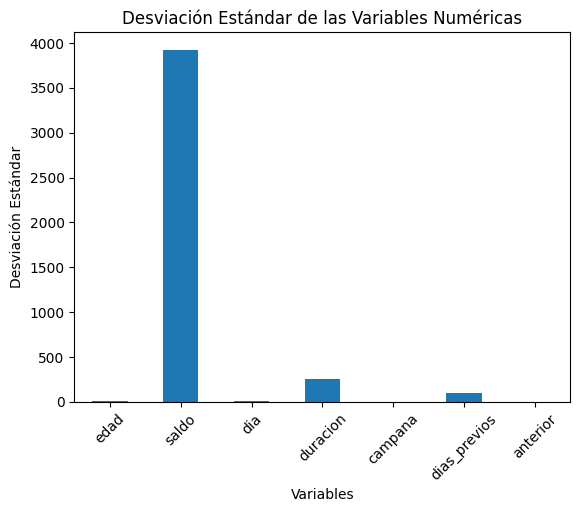

In [ ]:
# Crear una gráfica de barras para representar las desviaciones estándar
desviaciones_estandar.plot(kind='bar')
plt.title('Desviación Estándar de las Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Desviación Estándar')
plt.xticks(rotation=45)
plt.show()

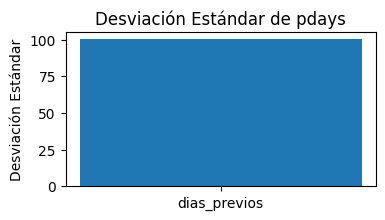

In [ ]:
# Graficar la desviación estándar de 'pdays'
plt.figure(figsize=(4, 2))  # Configura el tamaño de la figura
plt.bar('dias_previos', destd_pdays)  # Crea una barra para la desviación estándar de 'pdays'
plt.title('Desviación Estándar de pdays')
plt.ylabel('Desviación Estándar')
plt.show()

In [ ]:
# Calcula la media del atributo "pdays: dias de contacto al usuario antes de la campaña actual"
media = df_banco['dias_previos'].mean()

print("Promedio de dias de contacto:", media)

Promedio de dias de contacto: 40.19248462865484


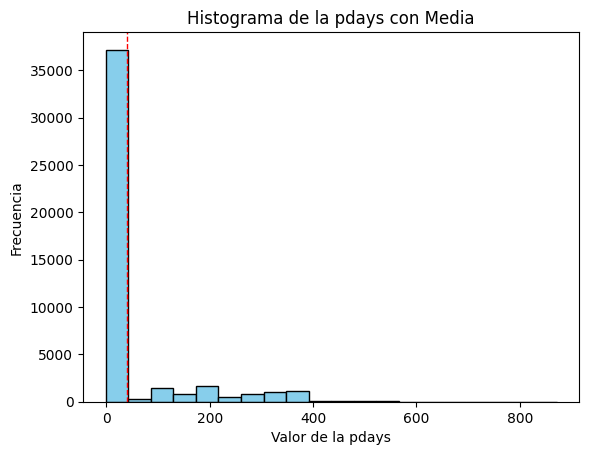

In [ ]:
# Graficar un histograma del atributo "pdays"
plt.hist(df_banco['dias_previos'], bins=20, color='skyblue', edgecolor='black')

# Agregar una línea vertical para mostrar la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y título
plt.xlabel('Valor de la pdays')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con Media')

# Mostrar la gráfica
plt.show()